# First Model - 

**Project: Zero-emission Industrialized Modular Highrise Construction**

## Data 

Data Collection for the first test:  
regarding different locations for the study including construction sites, demolitions sites, construction hubs ('bouwhubs), etc.

### Construction Sites 

Construction Sites Datasets consists out of *names*, *locations*, *phase*, *type*.  
  
It is collected using the list of project in Amsterdam (ongoing, completed, planned) and both conventional and biobased projects are included.


In [1]:
# import libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import geopandas as gpd
import osmnx as ox
import pandas as pd


#### Preparation of the files

Construction Sites CSV file 'data_construction_sites.csv'

In [2]:

# load the data from the CSV file

data_cs= gpd.read_file('data_construction_sites.csv')

print(data_cs.head())

# the location data is found in Lat/Long


  Project name                               Developer       Status  \
0         Haut  Lingotto (and ARUP, J.P. van Eesteren)    Completed   
1        Switi                                     BPD  In progress   
2      Stories                                     CPO    Completed   
3     Patch 22                              Lemniskade    Completed   
4       Top-up                              Lemniskade    Completed   

    Duration    Type   Latitude Longitude field_8 field_9 geometry  
0  2016-2022  Timber  52.370216  4.895168                     None  
1       2023  Timber  52.310754  4.971066                     None  
2       2021  Timber  52.396051  4.903902                     None  
3  2010-2016  Timber  52.395260  4.905431                     None  
4  2017-2019  Timber  52.395182  4.905919                     None  


In [ ]:
# see values in coordinates

print(data_cs['Longitude'].unique())
print(data_cs['Latitude'].unique())

In [3]:
# replace missing values 

data_cs['Longitude'] = data_cs['Longitude'].replace('', np.nan).fillna(0)
data_cs['Latitude'] = data_cs['Latitude'].replace('', np.nan).fillna(0)

In [4]:
# set coordinates system and geometry

data_cs['geometry'] = gpd.points_from_xy(data_cs['Longitude'], data_cs['Latitude'])


In [5]:
# set the coordinate reference system (CRS) to WGS 84 (EPSG: 4326)

data_cs = data_cs.set_crs(epsg=4326)

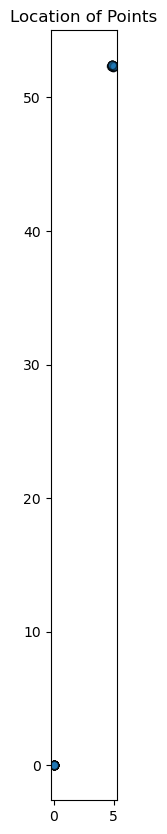

In [6]:
# plot the points on the map

ax = data_cs.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# add a title to the plot
ax.set_title('Location of Points')

plt.show()

# there is a problem with representation of the data

In [21]:
print(data_cs.geometry)


# There are some rows with no data, repair this in the next step



0     POINT (4.89517 52.37022)
1     POINT (4.97107 52.31075)
2     POINT (4.90390 52.39605)
3     POINT (4.90543 52.39526)
4     POINT (4.90592 52.39518)
5     POINT (4.96002 52.37565)
6     POINT (4.96002 52.37565)
7     POINT (4.96002 52.37565)
8     POINT (4.86307 52.33713)
9     POINT (4.87741 52.33800)
10    POINT (4.83759 52.38635)
11    POINT (4.96002 52.37565)
12    POINT (4.96002 52.37565)
13    POINT (4.95649 52.32305)
14    POINT (4.97222 52.30750)
15    POINT (4.88969 52.37403)
16    POINT (4.83716 52.38666)
17    POINT (4.83491 52.38806)
18    POINT (4.83216 52.38525)
19    POINT (4.88895 52.40399)
20    POINT (4.94284 52.31435)
21    POINT (4.89906 52.40169)
22    POINT (4.88969 52.37403)
23    POINT (4.86392 52.33697)
24    POINT (4.89326 52.33841)
25    POINT (4.90244 52.39173)
26    POINT (5.01463 52.35396)
27    POINT (5.01463 52.35396)
28    POINT (4.89315 52.40258)
29     POINT (0.00000 0.00000)
30     POINT (0.00000 0.00000)
31     POINT (0.00000 0.00000)
32     P

In [27]:
# use .iloc to select the first 28 rows of the GeoDataFrame

data_cs2 = data_cs.iloc[:29]

print(data_cs2.geometry)

#empty rows are cleaned


0     POINT (4.89517 52.37022)
1     POINT (4.97107 52.31075)
2     POINT (4.90390 52.39605)
3     POINT (4.90543 52.39526)
4     POINT (4.90592 52.39518)
5     POINT (4.96002 52.37565)
6     POINT (4.96002 52.37565)
7     POINT (4.96002 52.37565)
8     POINT (4.86307 52.33713)
9     POINT (4.87741 52.33800)
10    POINT (4.83759 52.38635)
11    POINT (4.96002 52.37565)
12    POINT (4.96002 52.37565)
13    POINT (4.95649 52.32305)
14    POINT (4.97222 52.30750)
15    POINT (4.88969 52.37403)
16    POINT (4.83716 52.38666)
17    POINT (4.83491 52.38806)
18    POINT (4.83216 52.38525)
19    POINT (4.88895 52.40399)
20    POINT (4.94284 52.31435)
21    POINT (4.89906 52.40169)
22    POINT (4.88969 52.37403)
23    POINT (4.86392 52.33697)
24    POINT (4.89326 52.33841)
25    POINT (4.90244 52.39173)
26    POINT (5.01463 52.35396)
27    POINT (5.01463 52.35396)
28    POINT (4.89315 52.40258)
Name: geometry, dtype: geometry


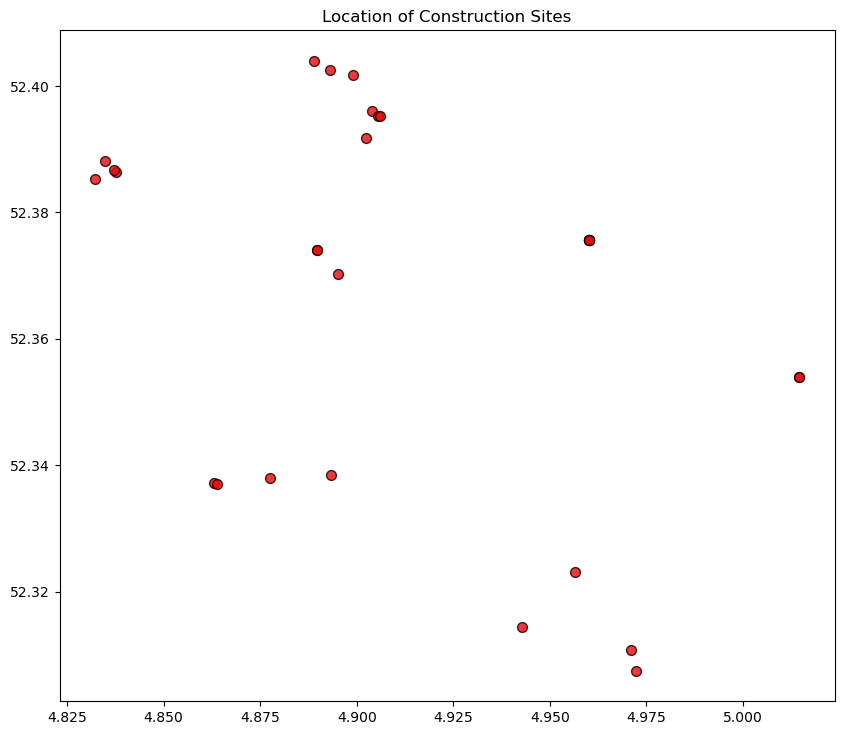

In [32]:

# plot the points on the map

ax = data_cs2.plot(figsize=(10, 10), alpha=0.8, edgecolor='k', color='red', markersize=50)


# add a title to the plot

ax.set_title('Location of Construction Sites')

plt.show()



### Construction Hubs

Construction Hubs are solution within the city, that help in making logistics, transportation and construction processes more effective and sustainable. They can have different roles such as assembly, storage, zero-emission charging/tanking, digitalization/organization, etc 

    Data file consists of *names, locations, type* (macrohub)

Currently there are only **ALC Amsterdam, ZO Hub**

In [36]:
# load the data from the CSV file

data_cb= gpd.read_file('data_construction_hubs.csv')

print(data_cb.head())

                         Name   Type     Latitude    Longitude geometry
0  Amsterdam Logistic CityHub  Macro  52.41680441  4.835733091     None
1         Dura Vermeer Hub ZO  Macro  52.31140129  4.966573992     None


In [37]:
# set coordinates system and geometry


data_cb['geometry'] = gpd.points_from_xy(data_cb['Longitude'], data_cb['Latitude'])


In [39]:
# set the coordinate reference system (CRS) to WGS 84 (EPSG: 4326)

data_cb = data_cb.set_crs(epsg=4326)

In [40]:
print(data_cb.geometry)



0    POINT (4.83573 52.41680)
1    POINT (4.96657 52.31140)
Name: geometry, dtype: geometry


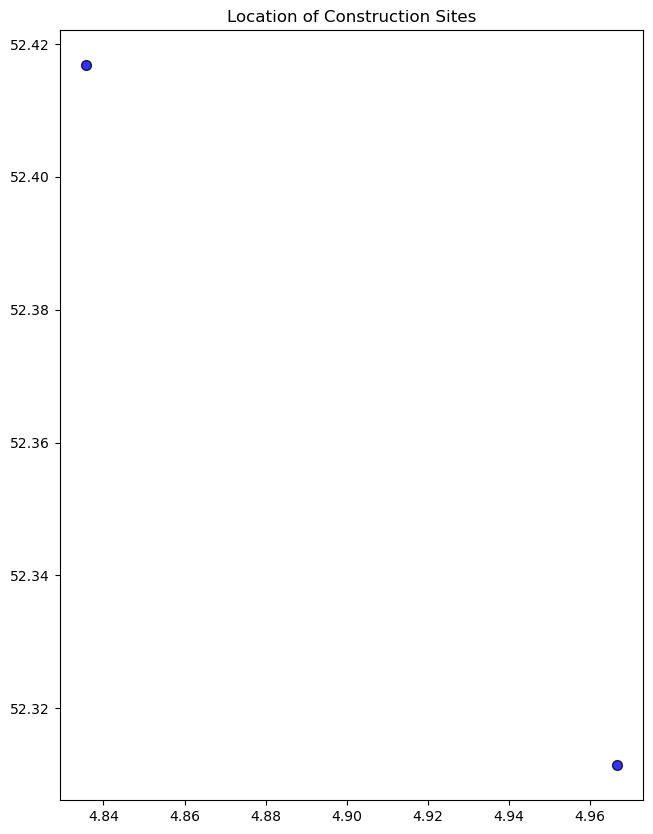

In [42]:
# plot the points on the map
ax = data_cb.plot(figsize=(10, 10), alpha=0.8, edgecolor='k', color='blue', markersize=50)

# add a title to the plot
ax.set_title('Location of Construction Sites')

plt.show()

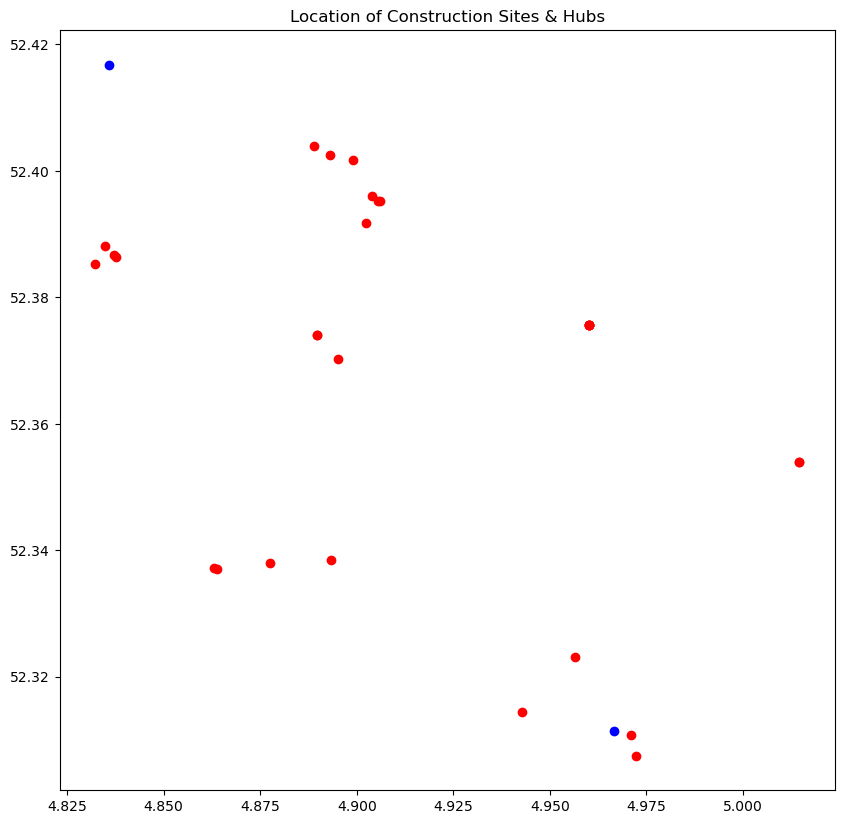

In [57]:
# plot both on the same Figure

fig, ax = plt.subplots(figsize=(10, 10))

# plot the points from the first GeoDataFrame on the axis object

data_cs2.plot(ax=ax, color='red')

# plot the points from the second GeoDataFrame on the same axis object

data_cb.plot(ax=ax, color='blue')

ax.set_title('Location of Construction Sites & Hubs')

# show the plot

plt.show()



### Making a map 

Plotting everything on a map  
*including area of Amsterdam, construction hubs & construction sites*  
*Legend/Title/Points*

C:\Users\pkoljensic\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


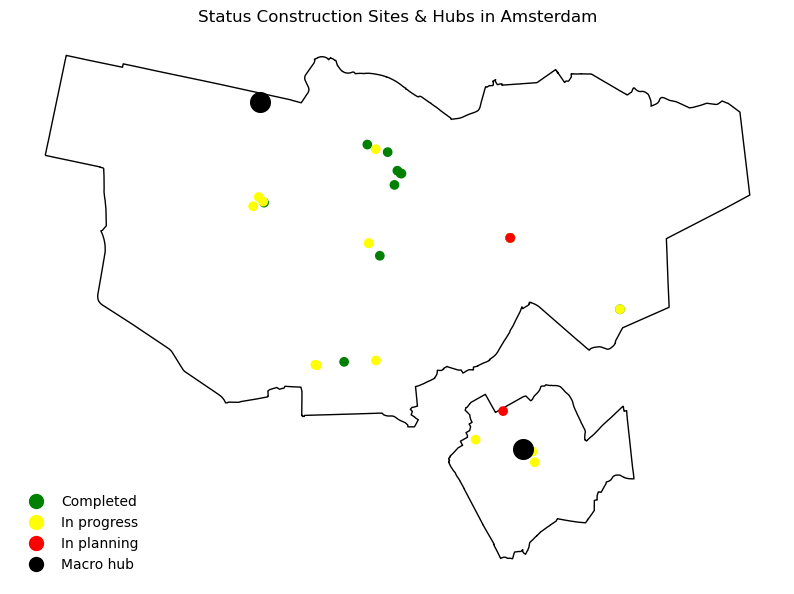

In [63]:
# setting colors/plotting

color_dict = {'Completed': 'green', 'In progress': 'yellow', 'DO': 'red'}

fig, ax = plt.subplots(figsize=(10, 10))


# Amsterdam polygon 

city = ox.geocode_to_gdf('Amsterdam, Netherlands')


city.plot(ax=ax, facecolor='white', edgecolor='black')


data_cs2.plot(ax=ax, column='Status', color=[color_dict[val] for val in data_cs2['Status']], legend=True)



# set legend & customize the legend labels

labels = {'Completed': 'Completed', 'In progress': 'In progress', 'DO': 'In planning'}
for key in labels:
    ax.plot([], [], color=color_dict[key], label=labels[key], marker='o', markersize=10, linestyle='')

# add the legend to the plot

ax.legend(frameon=False)


# add hubs data

data_cb.plot(ax=ax, color='black', markersize=200, legend=True)

hub_dict = {'Type': 'black'}
labels2 = {'Type': 'Macro hub'}
for key in labels2:
    ax.plot([], [], color=hub_dict[key], label=labels2[key], marker='o', markersize=10, linestyle='')
    

# add the legend to the plot

ax.legend(frameon=False, loc='lower left')

ax.set_title('Status Construction Sites & Hubs in Amsterdam')

ax.axis('off')



# plot map

plt.show()


0    MULTIPOLYGON (((4.72876 52.40071, 4.73371 52.4...
Name: geometry, dtype: geometry


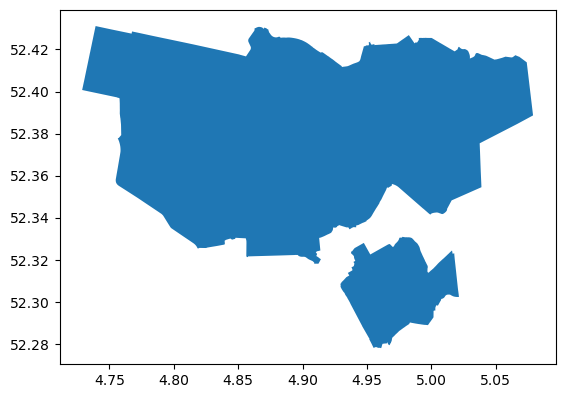

In [69]:
# only getting polygon (area) of Amsterdam

city = ox.geocode_to_gdf('Amsterdam, Netherlands')

print(city.geometry)

city.plot()

plt.show()


#### Amsterdam Street Network
Extracting using OSMNx library

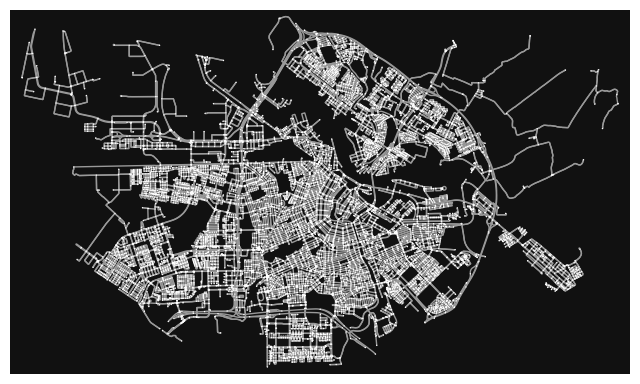

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [65]:
# import the package and download/plot the graph (drive)


G = ox.graph_from_place('Amsterdam, Amsterdam', network_type='drive')
ox.plot_graph(G, node_size=1, edge_linewidth=1)

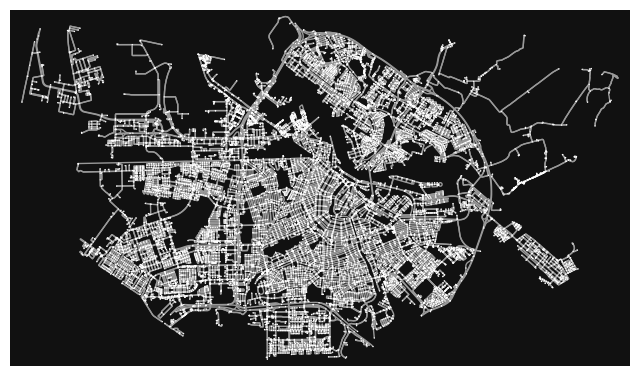

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [70]:
# import the package and download/plot the graph (drive_service)


G = ox.graph_from_place('Amsterdam, Amsterdam', network_type='drive_service')
ox.plot_graph(G, node_size=1, edge_linewidth=1)

#### Workaround with nodes/edges

In [71]:
# count edges & nodes 

print("node count:", len(G.nodes()))
print("edge count:", len(G.edges()))


node count: 17410
edge count: 39281


In [72]:
# add max speed and travel time

G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)


In [73]:
# convert the graph to a pandas geodataframe

df = ox.graph_to_gdfs(G, nodes=True, edges=True)

# display the nodes dataframe

print(df[0].head())

# display the edges dataframe

print(df[1].head())

                  y         x  street_count highway  ref  \
osmid                                                      
6316199   52.370173  4.888396             3     NaN  NaN   
25596477  52.367000  4.906097             1     NaN  NaN   
25658579  52.364536  4.930425             1     NaN  NaN   
26203121  52.364162  4.865235             3     NaN  NaN   
26206556  52.363425  4.872947             3     NaN  NaN   

                          geometry  
osmid                               
6316199   POINT (4.88840 52.37017)  
25596477  POINT (4.90610 52.36700)  
25658579  POINT (4.93042 52.36454)  
26203121  POINT (4.86524 52.36416)  
26206556  POINT (4.87295 52.36342)  
                                                 osmid       highway  oneway  \
u        v          key                                                        
6316199  46379627   0    [38297120, 7372610, 38297119]  unclassified   False   
         46389218   0                          7372614   residential    True   


In [74]:
# convert string address into geographical coordinates

def geocode_address(address, crs=4326):
    geocode = gpd.tools.geocode(address, provider='nominatim', 
                user_agent="drive time demo").to_crs(crs)
    return (geocode.iloc[0].geometry.y, geocode.iloc[0].geometry.x)

### Calcuations Routes

using *ox.shortest_path*  
The idea is to be able to calculate diverse routes from construction hubs to the construcion sites.   To create a dataframe and export it as csv.  


In [79]:

# get origin and destination coordinates #test one bouwhub location and one construction site, 
# it would be good to connect it directly to the database of hubs and construction sites.

origin_point = (52.4051, 4.80405)
destination_point = (52.34117, 4.91948)

In [80]:

# get closes graph nodes to origin and destination

orig_node = ox.distance.nearest_nodes(G, origin_point[1], origin_point[0])
destination_node = ox.distance.nearest_nodes(G, 
    destination_point[1], destination_point[0])

In [81]:
# route shortest time

route = ox.shortest_path(G, orig_node, destination_node, weight='travel_time')

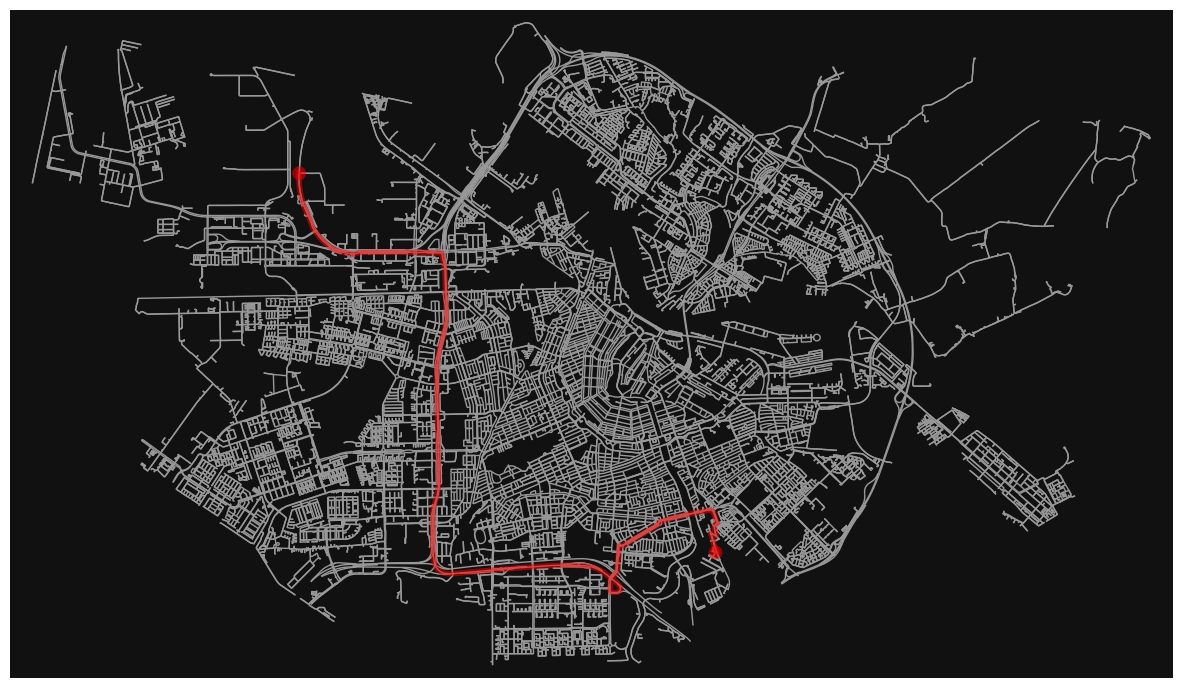

In [82]:
# show route 1 - shortest time

fig, ax = ox.plot_graph_route(G, route, node_size=0, figsize=(15,15))

In [83]:
# total value as distance 1

edge_lengths = ox.utils_graph.get_route_edge_attributes(
    G, route, 'length') 
total_route_length = sum(edge_lengths)
print("Total route length in km:", total_route_length/1000)

# total value as travel time 1

edge_travel_time = ox.utils_graph.get_route_edge_attributes(
    G, route, 'travel_time') 
route_travel_time = sum(edge_travel_time)
print("Travel time in minutes:", route_travel_time/60)

Total route length in km: 17.454288
Travel time in minutes: 15.436666666666673


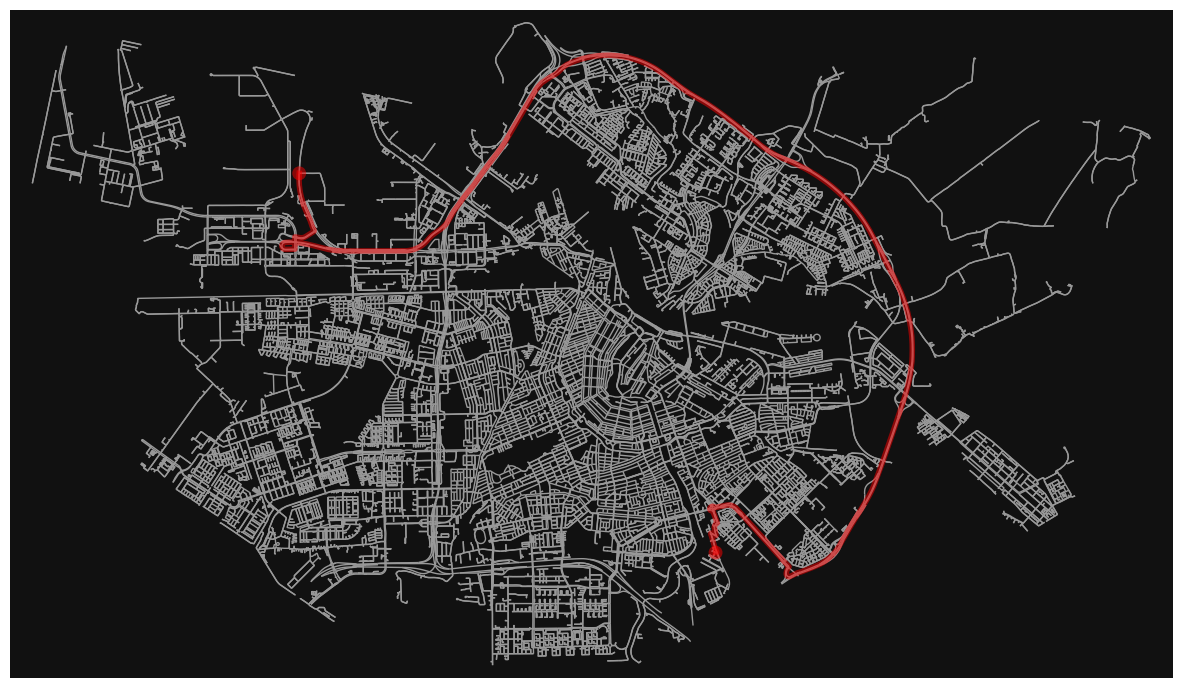

In [86]:
# show route 2 - shortest distance

route = ox.shortest_path(G, orig_node, destination_node, 'distance')
fig, ax = ox.plot_graph_route(G, route, node_size=0, figsize=(15,15))

In [90]:
# total value as distance 2

edge_lengths = ox.utils_graph.get_route_edge_attributes(
    G, route, 'length') 
total_route_length = sum(edge_lengths)
print("Total route length in km:", total_route_length/1000)

# total value as travel time 2

edge_travel_time = ox.utils_graph.get_route_edge_attributes(
    G, route, 'travel_time') 
route_travel_time = sum(edge_travel_time)
print("Travel time in minutes:", route_travel_time/60)


Total route length in km: 26.942100999999994
Travel time in minutes: 18.458333333333325


### Trying to import calculations of routes distance and time into Dataframe

not working... 

In [73]:
 # initialize an empty dictionary

construction_data = {'CB': [], 'CS': []}

for h in data_cb:
    for c in data_cs2:
        construction_data['CB'].append(h.geometry)
        construction_data['CS'].append(c.geometry)

df_construction = pd.DataFrame(construction_data)

AttributeError: 'str' object has no attribute 'geometry'

### Testing - not working (Calculation of all routes in km etc)

construction hub (closest) to construction site and back!__

idea to make a for loop that calcualtes distance in km and returns total value.




In [57]:
print(data_cb.geometry)

0    POINT (4.83573 52.41680)
1    POINT (4.96657 52.31140)
Name: geometry, dtype: geometry


In [59]:
print(data_cs2.geometry)

0     POINT (4.89517 52.37022)
1     POINT (4.97107 52.31075)
2     POINT (4.90390 52.39605)
3     POINT (4.90543 52.39526)
4     POINT (4.90592 52.39518)
5     POINT (4.96002 52.37565)
6     POINT (4.96002 52.37565)
7     POINT (4.96002 52.37565)
8     POINT (4.86307 52.33713)
9     POINT (4.87741 52.33800)
10    POINT (4.83759 52.38635)
11    POINT (4.96002 52.37565)
12    POINT (4.96002 52.37565)
13    POINT (4.95649 52.32305)
14    POINT (4.97222 52.30750)
15    POINT (4.88969 52.37403)
16    POINT (4.83716 52.38666)
17    POINT (4.83491 52.38806)
18    POINT (4.83216 52.38525)
19    POINT (4.88895 52.40399)
20    POINT (4.94284 52.31435)
21    POINT (4.89906 52.40169)
22    POINT (4.88969 52.37403)
23    POINT (4.86392 52.33697)
24    POINT (4.89326 52.33841)
25    POINT (4.90244 52.39173)
26    POINT (5.01463 52.35396)
27    POINT (5.01463 52.35396)
28    POINT (4.89315 52.40258)
Name: geometry, dtype: geometry


In [ ]:
construction_data = {'CB': [data_cb.geometry]
        'CS': [data_cs.geometry], 
        'DistanceKM': [25, 30, 22, 28], 
        'TimeMIN': ['New York', 'Paris', 'London', 'Tokyo']}

In [85]:

#Load Data


cbcs_data = pd.read_csv('data_const_hubs_.csv')


print(cbcs_data.head())

print(cbcs_data.LatitudeH)
print(cbcs_data.LongitudeH)

                         Name   Type  LatitudeH  LongitudeH Project name  \
0  Amsterdam Logistic CityHub  Macro  52.416804    4.835733         Haut   
1  Amsterdam Logistic CityHub  Macro  52.416804    4.835733        Switi   
2  Amsterdam Logistic CityHub  Macro  52.416804    4.835733      Stories   
3  Amsterdam Logistic CityHub  Macro  52.416804    4.835733     Patch 22   
4  Amsterdam Logistic CityHub  Macro  52.416804    4.835733       Top-up   

                                Developer       Status   Duration  Type.1  \
0  Lingotto (and ARUP, J.P. van Eesteren)    Completed  2016-2022  Timber   
1                                     BPD  In progress       2023  Timber   
2                                     CPO    Completed       2021  Timber   
3                              Lemniskade    Completed  2010-2016  Timber   
4                              Lemniskade    Completed  2017-2019  Timber   

   LatitudeC  LongitudeC  
0  52.370216    4.895168  
1  52.310754    4.971066  

In [92]:
from shapely.geometry import Point

# read the CSV file into a DataFrame
cbcs_data = pd.read_csv('data_const_hubs_.csv')

# create a Point object for each row in the DataFrame
geometry = [Point(xy) for xy in zip(cbcs_data.LongitudeH, cbcs_data.LatitudeH)]

# create a GeoDataFrame with the Point objects and the original DataFrame columns
gdf = gpd.GeoDataFrame(cbcs_data, geometry=geometry, crs='EPSG:4326')

# print the first few rows of the GeoDataFrame
print(gdf.head())

                         Name   Type  LatitudeH  LongitudeH Project name  \
0  Amsterdam Logistic CityHub  Macro  52.416804    4.835733         Haut   
1  Amsterdam Logistic CityHub  Macro  52.416804    4.835733        Switi   
2  Amsterdam Logistic CityHub  Macro  52.416804    4.835733      Stories   
3  Amsterdam Logistic CityHub  Macro  52.416804    4.835733     Patch 22   
4  Amsterdam Logistic CityHub  Macro  52.416804    4.835733       Top-up   

                                Developer       Status   Duration  Type.1  \
0  Lingotto (and ARUP, J.P. van Eesteren)    Completed  2016-2022  Timber   
1                                     BPD  In progress       2023  Timber   
2                                     CPO    Completed       2021  Timber   
3                              Lemniskade    Completed  2010-2016  Timber   
4                              Lemniskade    Completed  2017-2019  Timber   

   LatitudeC  LongitudeC                  geometry  
0  52.370216    4.895168  P

In [93]:
#CALCULATION LOOP

# get origin and destination coordinates


origin_point = []
destination_point = []

for index, row in cbcs_data.iterrows():
    origin_point.append((row['LatitudeH'], row['LongitudeH']))
    destination_point.append((row['LatitudeC'], row['LongitudeC']))

In [108]:

# get closes graph nodes to origin and destination
orig_node = ox.distance.nearest_nodes(G, origin_point[1], origin_point[0])
destination_node = ox.distance.nearest_nodes(G, 
    destination_point[1], destination_point[0])

In [120]:
#Route shorest distance


# flatten the list of lists to a flat list of node IDs
route_flat = [node for sublist in route for node in sublist]

# plot the graph with the flattened route
fig, ax = ox.plot_graph_route(G, route_flat, node_size=0, figsize=(15,15))


#route = ox.shortest_path(G, orig_node, destination_node, 'distance')
#fig, ax = ox.plot_graph_route(G, route, node_size=0, figsize=(15,15))


[[2876000370], [46166922]]


AttributeError: 'list' object has no attribute 'values'

In [118]:
#TOTAL VALUE DISTANCE 2

edge_lengths = ox.utils_graph.get_route_edge_attributes(
    G, route, 'length') 
total_route_length = sum(edge_lengths)
print("Total route length in km:", total_route_length/1000)

TypeError: unhashable type: 'list'